<a href="https://colab.research.google.com/github/tunahanayaz/Titanic-Disaster-Analysis/blob/main/Superstore_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [370]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [426]:
data = pd.read_csv("train.csv")

In [427]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [373]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [374]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9800.0,4900.500000,2829.160653,1.000,2450.750,4900.50,7350.250,9800.00
Postal Code,9789.0,55273.322403,32041.223413,1040.000,23223.000,58103.00,90008.000,99301.00
Sales,9800.0,230.769059,626.651875,0.444,17.248,54.49,210.605,22638.48


In [423]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [422]:
df = data.drop(["Row ID","Order ID","Customer ID","Product ID"],axis =1)

In [428]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
0,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [378]:
data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [429]:
df[df["Postal Code"].isnull()]   

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
2234,05/12/2018,10/12/2018,Standard Class,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,07/11/2016,09/11/2016,Second Class,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,06/04/2017,10/04/2017,Standard Class,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,23/01/2017,27/01/2017,Standard Class,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,23/01/2017,27/01/2017,Standard Class,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,Office Supplies,Art,4009 Highlighters,8.04
9148,23/01/2017,27/01/2017,Standard Class,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Paper,Xerox 191,79.92
9387,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Paper,Xerox 1881,12.28
9388,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [430]:
df["Postal Code"] = df["Postal Code"].fillna(5402)    # Burlington's zip code was searched and missing values was filled

In [431]:
df[df["City"] == "Burlington"]    

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
683,04/11/2018,04/11/2018,Same Day,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217.0,South,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980
684,04/11/2018,04/11/2018,Same Day,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217.0,South,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,167.440
1008,26/12/2018,01/01/2019,Standard Class,Patrick O'Brill,Consumer,United States,Burlington,Iowa,52601.0,Central,Office Supplies,Paper,"Recycled Desk Saver Line ""While You Were Out"" ...",44.750
1038,20/11/2018,21/11/2018,First Class,Jennifer Halladay,Consumer,United States,Burlington,North Carolina,27217.0,South,Office Supplies,Art,Newell 336,23.968
1039,20/11/2018,21/11/2018,First Class,Jennifer Halladay,Consumer,United States,Burlington,North Carolina,27217.0,South,Office Supplies,Art,Staples in misc. colors,28.728
1393,03/07/2018,04/07/2018,First Class,Yana Sorensen,Corporate,United States,Burlington,North Carolina,27217.0,South,Office Supplies,Art,4009 Highlighters by Sanford,9.552
2234,05/12/2018,10/12/2018,Standard Class,Quincy Jones,Corporate,United States,Burlington,Vermont,5402.0,East,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.030
2928,19/10/2018,26/10/2018,Standard Class,Tracy Hopkins,Home Office,United States,Burlington,North Carolina,27217.0,South,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1633.188
5065,30/11/2018,07/12/2018,Standard Class,Shahid Collister,Consumer,United States,Burlington,North Carolina,27217.0,South,Technology,Accessories,Logitech Wireless Gaming Headset G930,383.976
5066,30/11/2018,07/12/2018,Standard Class,Shahid Collister,Consumer,United States,Burlington,North Carolina,27217.0,South,Furniture,Tables,Bush Advantage Collection Racetrack Conference...,1781.682


In [432]:
df.isnull().sum()  

Order Date       0
Ship Date        0
Ship Mode        0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

# Sales by months and years were analyzed

In [433]:
df["Month"] = df["Order Date"].str[3:5] 
df

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month
0,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,11
1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,11
2,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,06
3,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,10
4,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,21/05/2017,28/05/2017,Standard Class,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,05
9796,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,01
9797,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,GE 30524EE4,235.1880,01
9798,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,01


In [434]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order Date     9800 non-null   object 
 1   Ship Date      9800 non-null   object 
 2   Ship Mode      9800 non-null   object 
 3   Customer Name  9800 non-null   object 
 4   Segment        9800 non-null   object 
 5   Country        9800 non-null   object 
 6   City           9800 non-null   object 
 7   State          9800 non-null   object 
 8   Postal Code    9800 non-null   float64
 9   Region         9800 non-null   object 
 10  Category       9800 non-null   object 
 11  Sub-Category   9800 non-null   object 
 12  Product Name   9800 non-null   object 
 13  Sales          9800 non-null   float64
 14  Month          9800 non-null   object 
dtypes: float64(2), object(13)
memory usage: 1.1+ MB


In [435]:
df["Month"] = df["Month"].astype("int32")   # The type of months column should be changed object to integer
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month
0,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,11
1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,11
2,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,6
3,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,10
4,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,10


# Month names are entered

In [436]:
number_to_name = {
     1: "January",
     2: "February",
     3: "March",
     4: "April",
     5: "May",
     6: "June",
     7: "July",
     8:"August",
     9: "September",
     10: "October",
     11: "November",
     12: "December"
}

df["Month"] = [number_to_name[i] for i in df["Month"]]

In [439]:
df.head()   

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month
0,2017-08-11,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,November
1,2017-08-11,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,November
2,2017-12-06,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,June
3,2016-11-10,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,October
4,2016-11-10,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,October


In [441]:
df["Order Date"] = pd.to_datetime(df["Order Date"])  

In [442]:
df["Ship Date"] = pd.to_datetime(df["Ship Date"]) 
df.head()

<ipython-input-442-ab21534a2fc4>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Ship Date"] = pd.to_datetime(df["Ship Date"])


,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month
0,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,November
1,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,November
2,2017-12-06,2017-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,June
3,2016-11-10,2016-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,October
4,2016-11-10,2016-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,October


In [444]:
df["Year"] = df["Order Date"].dt.year  
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month,Year
0,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,November,2017
1,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,November,2017
2,2017-12-06,2017-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,June,2017
3,2016-11-10,2016-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,October,2016
4,2016-11-10,2016-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,October,2016


In [445]:
df["Year"].value_counts()

2018    3258
2017    2534
2016    2055
2015    1953
Name: Year, dtype: int64

In [446]:
df["Month"].value_counts()

November     1449
December     1382
September    1354
October       809
May           725
July          697
August        693
June          691
March         680
April         657
January       366
February      297
Name: Month, dtype: int64

# Which month has the most sales?

In [453]:
month_sales = df.groupby("Month").sum()  
month_sales

<ipython-input-453-de6d1a3baf7a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  month_sales = df.groupby("Month").sum()


,Postal Code,Sales,Year
Month,,,
April,34472176.0,136283.0006,1324950
August,39887477.0,157315.9270,1397545
December,79735933.0,321480.1695,2787094
February,16533469.0,59371.1154,598997
January,20406756.0,94291.6296,738154
July,38081551.0,145535.6890,1405652
June,37001159.0,145837.5233,1393591
March,37422279.0,197573.5872,1371361
May,39303261.0,154086.7237,1462180


In [454]:
month_sales = month_sales[["Sales"]]   
month_sales

,Sales
Month,
April,136283.0006
August,157315.9270
December,321480.1695
February,59371.1154
January,94291.6296
July,145535.6890
June,145837.5233
March,197573.5872
May,154086.7237


In [455]:
month_sales.reset_index(inplace = True)   # We can't think of our data as an index, we need to use reset_index().

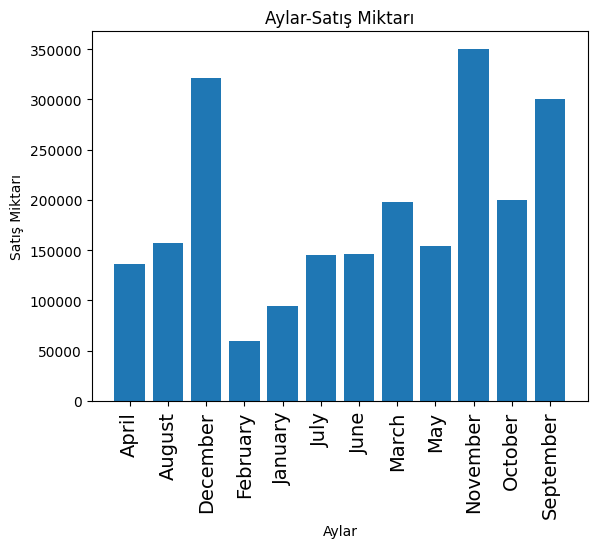

In [456]:
plt.bar(month_sales["Month"],month_sales["Sales"])      
plt.xlabel("Aylar")
plt.ylabel("Satış Miktarı")
plt.title("Aylar-Satış Miktarı")
plt.xticks(fontsize=14,rotation = 90)
plt.xticks(fontsize=14)
plt.show()

In [457]:
year_sales = df.groupby("Year").sum()
year_sales = year_sales[["Sales"]]
year_sales

<ipython-input-457-28a67bfdd7da>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_sales = df.groupby("Year").sum()


,Sales
Year,
2015,479856.2081
2016,459436.0054
2017,600192.5500
2018,722052.0192


In [458]:
year_sales.reset_index(inplace= True)
year_sales

,Year,Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


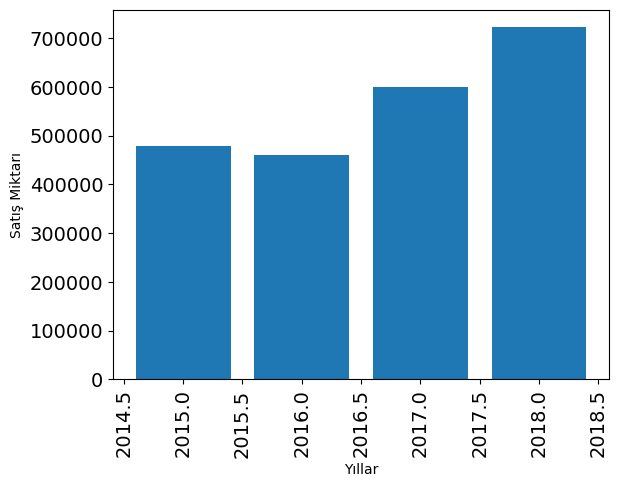

In [460]:
plt.bar(year_sales['Year'],year_sales["Sales"])
plt.xlabel("Yıllar")
plt.ylabel("Satış Miktarı")
plt.xticks(fontsize = 14,rotation = 90)
plt.yticks(fontsize = 14)
plt.show()

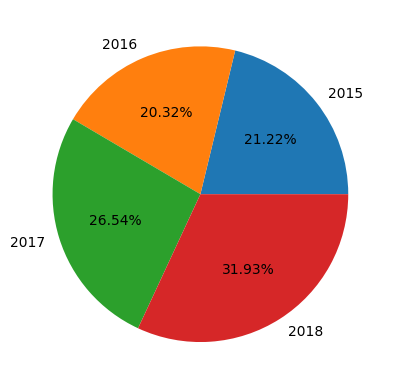

In [461]:
plt.pie(year_sales["Sales"],labels=year_sales["Year"],autopct="%0.2f%%")
plt.show()

# Top spending customer

In [402]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month,Year
0,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,November,2017
1,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,November,2017
2,2017-12-06,2017-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,June,2017
3,2016-11-10,2016-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,October,2016
4,2016-11-10,2016-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,October,2016


In [403]:
customer = df.groupby("Customer Name").sum().sort_values("Sales",ascending=False)
customer = customer.drop(["Postal Code","Year"],axis=1)
customer.reset_index()

<ipython-input-403-25a33d1ed686>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customer = df.groupby("Customer Name").sum().sort_values("Sales",ascending=False)


,Customer Name,Sales
0,Sean Miller,25043.050
1,Tamara Chand,19052.218
2,Raymond Buch,15117.339
3,Tom Ashbrook,14595.620
4,Adrian Barton,14473.571
...,...,...
788,Mitch Gastineau,16.739
789,Carl Jackson,16.520
790,Sung Chung,14.112
791,Lela Donovan,5.304


In [404]:
customer[customer["Sales"] == customer["Sales"].max()]   

,Sales
Customer Name,
Sean Miller,25043.05


In [462]:
customer20 = customer.head(20).reset_index()


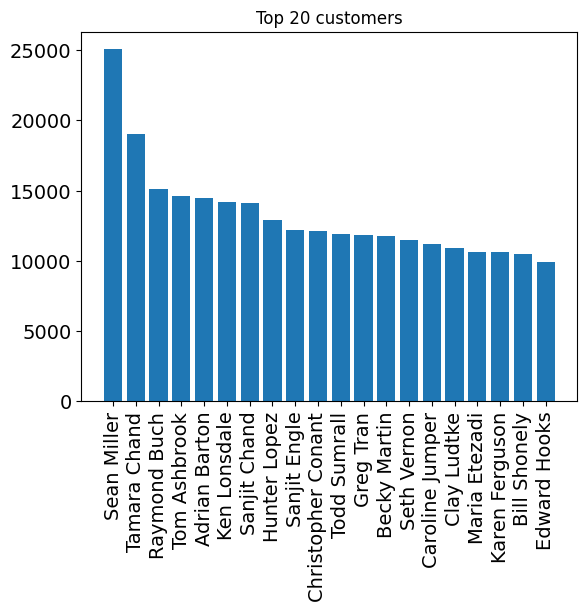

In [464]:
plt.bar(customer20["Customer Name"],customer20["Sales"])
plt.xticks(fontsize = 14, rotation = 90)
plt.yticks(fontsize = 14)
plt.title("Top 20 customers")
plt.show()

In [407]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Month,Year
0,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,November,2017
1,2017-08-11,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,November,2017
2,2017-12-06,2017-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,June,2017
3,2016-11-10,2016-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,October,2016
4,2016-11-10,2016-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,October,2016


# Analyzed by category



In [465]:
category = df.groupby("Category").sum().sort_values("Sales",ascending=False)
category = category["Sales"].reset_index()
category

<ipython-input-465-4344af4ff7a5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  category = df.groupby("Category").sum().sort_values("Sales",ascending=False)


,Category,Sales
0,Technology,827455.8730
1,Furniture,728658.5757
2,Office Supplies,705422.3340


Text(0, 0.5, 'Satış miktarı')

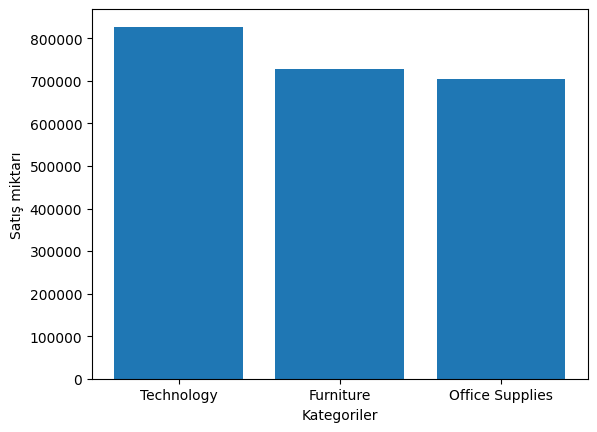

In [466]:
plt.bar(category["Category"],category["Sales"])
plt.xlabel("Kategoriler")
plt.ylabel("Satış miktarı")

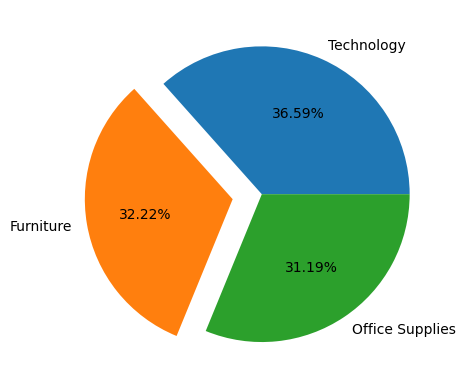

In [468]:
plt.pie(category["Sales"],labels=category["Category"],autopct="%0.2f%%",explode=[0,0.2,0])   
plt.show()

In [469]:
#Done